In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import division, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import itertools
from kpfm.util import align_labels

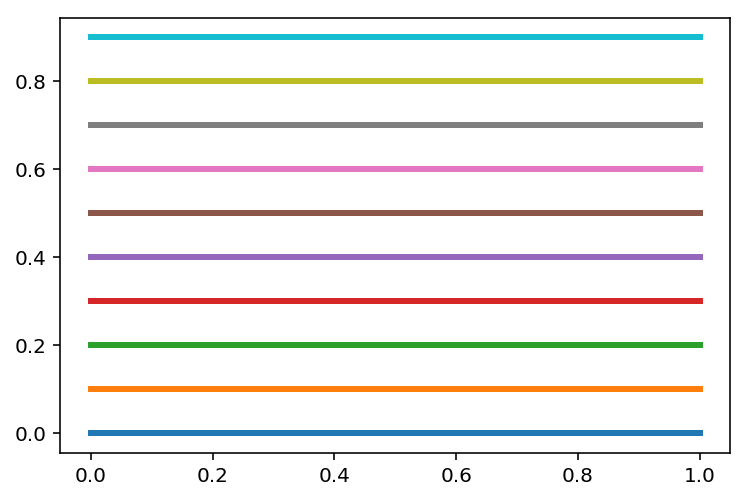

In [2]:
colors = [plt.plot([0, 1], [i*0.1, i*0.1], linewidth=3)[0].get_color() for i in xrange(10)];

In [3]:
t0 = -2e3
dt = 1e-8 * 1e6
T = 4e3
N = int(T/dt)
t = np.arange(N) *dt + t0


sim_params = dict(t0=-2e-3,
                 dt=dt,
                 T=T,
                 N=N,
                 t=np.arange(N)*dt+t0,
                 x0=np.array([0,0]),
                 fir=np.ones(190)/190.0)


workup_params = {'bandpass_filter': 1.0,
              'drive_freq': 0.5233,
              'filter_bandwidth': 3000.0*1e-6,
              'n_taps': 1799,
              'roi': 0.0003,
              'sampling_rate': 10.0,
              'total_time': 3e-3*1e6,
              'trigger': 2e-3*1e6,
              'window': 'blackman',
              'wavelet_analysis': 0}

In [4]:
dev = 1e-4
omega_0 = 2 * np.pi *10 /19
omega_f = omega_0 * (1 - dev)
k = 72.7
Q = 499
A = 0.01 # 10 nanometer amplitude
F_d = A * k / Q
F_hv = 0.06e-3*k
omega_d = omega_0
taus = np.logspace(-2, 0, 3)
phif_s = np.array([-0.06, -0.03, 0])

    
    
# F_hvs = -0.06e-3*k*(1 + (omega_0 * taus)**2) * np.arange(0, 2.5)

# params = 

# for tau in taus:
#     for F_hv in F_hvs:
#         ds.append(DDHO(omega_0=omega_0, k=k, Q=Q, omega_f=omega_f,
#          omega_d=omega_d, F_d=F_d, phi_d=np.pi, tau=tau, F_hv=F_hv, tau_F=tau
#         ))

# [f]

In [5]:
combos = [(tau, k*0.01*(1 + (omega_0 * tau)**2), phif) for (tau, phif) in itertools.product(taus, phif_s)]

In [6]:
combos2 = [
     (1.0, 8.6773627696309852/10, -0.029999999999999999/10,
  dict(color="#21409A", linewidth=1.2),dict(marker='s', markersize=2.6)),
 (0.10000000000000001, 0.8065036276963099/10, 0.0,
  dict(color="#006838"),dict(marker='*', markersize=3.6)),
 (0.10000000000000001, 0.8065036276963099/10, -0.059999999999999998/10,
  dict(color="#26B251"),dict(marker='<', markersize=3.1)),
        (0.01, 0.72779503627696307/10, -0.029999999999999999/10, 
            dict(color="#40C6FF", linewidth=1.2), dict(marker='.', markersize=4.5)),
  (0.10000000000000001, 0.8065036276963099/10, -0.029999999999999999/10,
      dict(color=colors[1], linewidth=1),dict()),
]

Text(0.5,0,u'Time $t$ [\xb5s]')

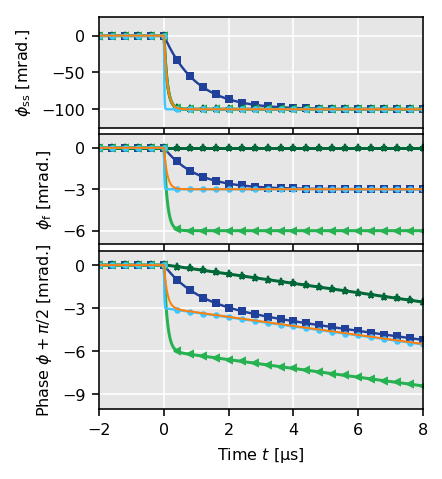

In [7]:
plt.rc('font', size=8)
fig, axes = plt.subplots(nrows=3,
                         subplot_kw=dict(
                             facecolor="0.9"
                         ), 
                         figsize=(2.9, 3.6),
                         gridspec_kw=dict(height_ratios=(0.7, 0.7, 1)),
                         sharex=True,
                        )
fig.patch.set_facecolor('none')

ax_ss = axes[0]
ax_f = axes[1]
ax0 = axes[2]


fig.subplots_adjust(hspace=0.05)

for ax in axes:
    ax.grid(color='1')

    
m = slice(0, -1, 100)

i_filt = [0, 3, 6]
i_norm = [0, 3, 6]
plot_colors = [colors[i] for i in i_filt]


dt = 0.01
T = 11
t0 = -2
N = int(T/dt)
t = np.arange(N) * dt + t0

phi0 = 0
delta_phi_ss = -0.0996
phi_f = phi0 + delta_phi_ss
gamma = omega_0 / (2*Q)


skip=40

for i, (tau, Fhv, phif, linestyle, markerstyle) in enumerate(combos2):
    ax_ss.plot(t, np.where(t > 0, 1, 0) * -0.1*(1-np.exp(-t/tau))*1e3, **linestyle)
    ax_ss.plot(t[::skip], (np.where(t > 0, 1, 0) * -0.1*(1-np.exp(-t/tau))*1e3)[::skip],
               linewidth=0, color=linestyle['color'], **markerstyle)
    ax_f.plot(t, np.where(t > 0, 1, 0) * phif*(1-np.exp(-t/tau))*1e3, **linestyle)
    ax_f.plot(t[::skip], (np.where(t > 0, 1, 0) * phif*(1-np.exp(-t/tau))*1e3)[::skip],
              linewidth=0, color=linestyle['color'], **markerstyle )
    
    
    
    ax0.plot(t, 1e3*np.where(t >=0, 
                phi_f - phif * np.exp(-t/tau) + (delta_phi_ss - phif) / (1 - gamma*tau) * (
                    gamma*tau * np.exp(-t/tau) - np.exp(-gamma*t))
                        ,phi0), **linestyle)
    ax0.plot(t[::skip], (1e3*np.where(t >=0, 
                phi_f - phif * np.exp(-t/tau) + (delta_phi_ss - phif) / (1 - gamma*tau) * (
                    gamma*tau * np.exp(-t/tau) - np.exp(-gamma*t))
                        ,phi0))[::skip], linewidth=0, color=linestyle['color'], **markerstyle )



# ax0.legend(loc=7)
ax0.set_ylim(-10, 1)
# ticks = np.arange(-np.pi/2, -1.58, -0.002)
ax0.set_yticks(np.arange(-9, 1, 3))
ax0.set_xlim(-2, 8)
# ax0.set_yticklabels([u"−{:.3f}".format(abs(x)) for x in ticks])
ax_f.set_ylim(-7, 1)
ax_f.set_yticks(np.arange(-6, 1, 3))
ax_f.set_yticks
ax_ss.set_ylim(-125, 25)

ax_f.set_ylabel("$\\phi_\\mathrm{f}$ [mrad.]")
ax_ss.set_ylabel("$\\phi_\\mathrm{ss}$ [mrad.]")
ax0.set_ylabel("Phase $\\phi + \\pi/2$ [mrad.]")

axes[-1].set_xlabel(u"Time $t$ [µs]")

In [8]:
align_labels(axes, 32)

In [9]:
fig.savefig('../figs/Fig09-approx-phase-model.pdf', bbox_inches='tight', pad_inches=0.5,
            facecolor=fig.get_facecolor(),
            edgecolor='none')